# Injection Molding Project
## Group 5 | MANU 465 | December 2 2021

## Project Description
We are a company that makes tables that require components with high tensile and yield strengths, beams that are stiff, and circular discs. 

The quality of the part produced by injection molding process is influenced by different parameters inside the injection molding machine such as fill pressure, back pressure, temperature of the melt and distanced traveled by the screw. Depending on the values of the parameters mentioned, a part can come out as successful or defective. Each part obtained from the injection molding machine is made up of three components: a circular disk, a tensile specimen, and a beam. A uniaxial tensile test is performed on the tensile specimen to measure strength, a bending test on the beam to measure deflection, and an imaging test to determine the quality of the disk. Parts with values that are within the allowed range will be classified as a ‘good’ part.
Given these machine parameters, a model will be trained using different machine learning regression models to predict part properties. 

 The machine learning models will be able to quickly predict the tensile and bending test output parameters as if full tests were completed. This can then be used to classify the quality of a particular part as a ‘good’ or ‘bad’ part.
 
 1. Regression models to determine yield strength and bending deflection.
 
 - Support Vector Regression(SVR)
 - ANN Regressor
 - Multiple Linear Regression

 2. Using Classification methods to determine the circular disc and overall part quality.
 
 - KNN
 - SVM 
 - Naive Bayes
 - Logistic Regression
 - ANN classifier

 3. Using CNN to determine whether a part is perfectly shaped or not after it has been made. This is to catch any defects that may have slipped past our aforementioned models.
This CNN model would be used in a real world scenario and would be fed picture data taken by an overhead camera positioned ontop of a conveyor belt transporting parts produced from the machine to the next stage in a factory.

Note that the outputs for the regression models are the numerical data of yield strength and deflection, and is stored in the variable y. 

The outputs for the classification models are good/bad outputs for disc and overall part quality, and are stored in y1.


## Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import io

## Importing the Dataset

In [ ]:

dataset = pd.read_csv('injection_molding_data.csv')

## A Quick Review of the Data

In [ ]:
pd.DataFrame(dataset)
#We assigned a 1 if the circular portion of the part came out bad, and 0 if it was successful.
#We then assigned a 0 if the overall part was good, and 1 if it was bad.


,Temp 1 (C),Temp 2 (C),Temp 3 (C),Temp 4 (C),Temp 5 (C),Pressure fill (bar),Screw distance (mm),Yield Strength (MPa),Bending Deflection (cm),Imperfect Circle (1 Y/ 0N),Part Quality (0 G/ 1B)
0,229,240,249,240,240,56,61,13.69,0.70,0,1.0
1,229,240,249,240,240,57,61,10.54,0.60,0,0.0
2,229,240,249,240,240,57,61,11.82,0.60,0,0.0
3,229,240,249,240,240,58,61,12.70,0.60,0,0.0
4,229,240,249,240,240,61,61,11.09,0.60,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
130,250,255,260,250,240,50,61,13.52,0.95,0,1.0
131,250,255,260,250,240,56,61,12.81,0.45,0,0.0
132,250,255,260,250,240,60,61,12.27,0.50,0,0.0
133,250,255,260,250,240,65,61,11.55,NaN,0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   #                           135 non-null    int64  
 1   Temp 1 (C)                  135 non-null    int64  
 2   Temp 2 (C)                  135 non-null    int64  
 3   Temp 3 (C)                  135 non-null    int64  
 4   Temp 4 (C)                  135 non-null    int64  
 5   Temp 5 (C)                  135 non-null    int64  
 6   Pressure fill (bar)         135 non-null    int64  
 7   Screw distance (mm)         135 non-null    int64  
 8   Yield Strength (MPa)        123 non-null    float64
 9   Bending Deflection (cm)     126 non-null    float64
 10  Imperfect Circle (1 Y/ 0N)  135 non-null    int64  
 11  Part Quality (0 G/ 1B)      131 non-null    float64
dtypes: float64(3), int64(9)
memory usage: 12.8 KB


## Separate Input and Output Data
Here, we put the independent variables in X and the dependent variable in y (regression outputs) and y1 (classification outputs). 

In [ ]:
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:,8:10].values
y1 = dataset.iloc[:, 10:12].values
y0 = np.logical_or(y1[:,0],y1[:,1])

#### exploring the data


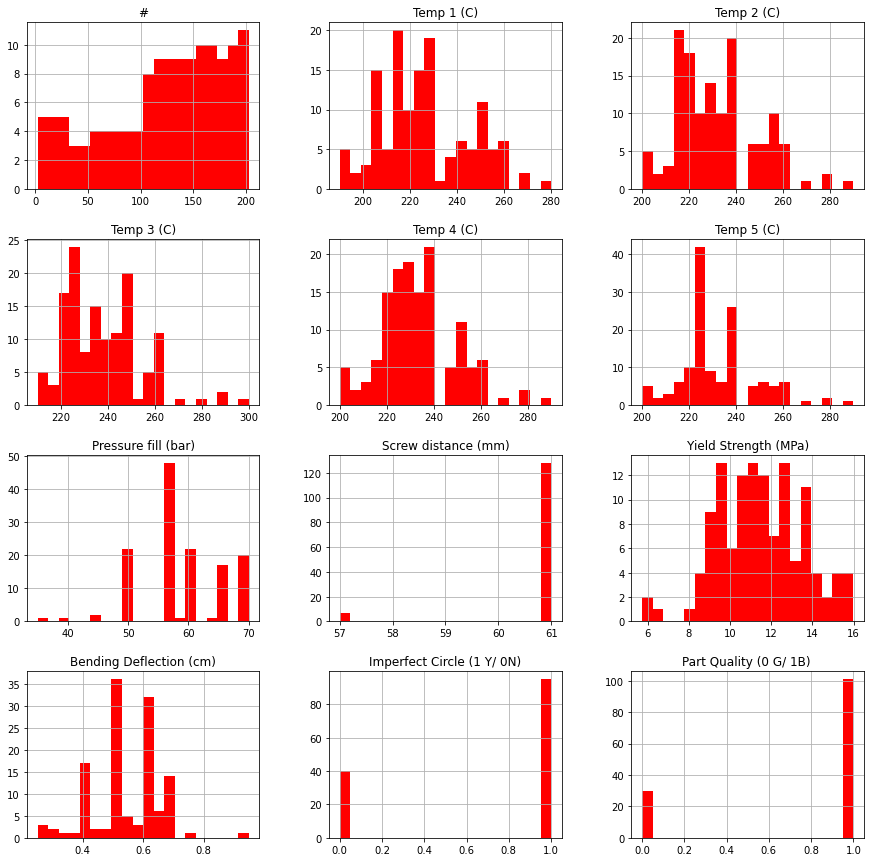

In [ ]:
dataset.hist(bins=20,figsize=(15,15), color="red")
plt.show()


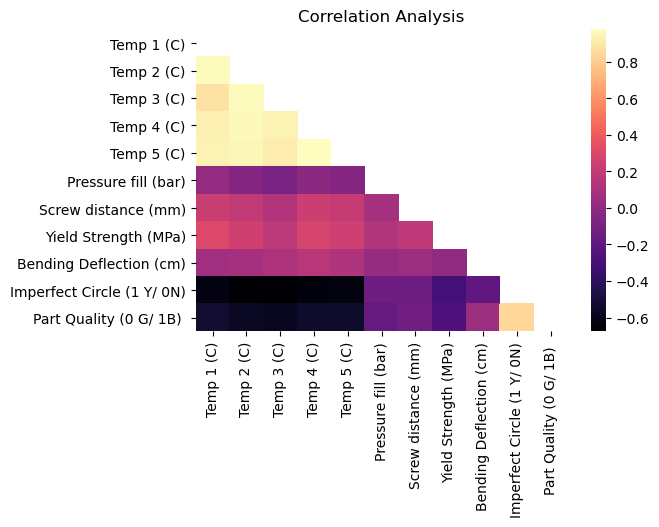

In [ ]:
#create a correlation matrix
# the (#) appears as a feature but it was included since we decided to keep it in the dataset 

corr_matrix = dataset.corr() 
mask = np.triu(np.ones_like(corr_matrix,dtype = bool)) # Only keep the upper triangle of
from seaborn import heatmap
plt.figure(dpi=100)
plt.title('Correlation Analysis')
heatmap(corr_matrix,mask=mask,annot=False,lw=0,linecolor='white',cmap='magma')
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()


## Handle missing data

In [ ]:
# There is no missing data for the input parameters, only the output paramters ( Yield strength and deflection have missing data)
# Since we couldn't do tensile testing and beam deflection for all parts, we decided to impute the missing data using 'mean' strategy
from sklearn.impute import SimpleImputer
imputer0 = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imputer0.fit_transform(y)
imputer1 = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=1)
y1 = imputer1.fit_transform(y1)

In [ ]:
# A quick check
pd.DataFrame(y)

,0,1
0,13.69,0.700000
1,10.54,0.600000
2,11.82,0.600000
3,12.70,0.600000
4,11.09,0.600000
...,...,...
130,13.52,0.950000
131,12.81,0.450000
132,12.27,0.500000
133,11.55,0.538571


## Dataset Analysis

Principal Component Analysis

In [ ]:
n=7
from sklearn.decomposition import PCA
PrinCom=PCA(n_components=n)
Z=PrinCom.fit_transform(X)

e=[0]*n
den=0
for i in range(n):
    e[i]=np.var(Z[:,i])
    den+=e[i]

for count in range(1,8):
    num=0
    for j in range(count):
        num+=e[j]

    pc=100*(num)/(den)
    print("The first {} PCs can describe {:.2f} of the information in this dataset.".format(count,pc))

The first 1 PCs can describe 91.98 of the information in this dataset.
The first 2 PCs can describe 95.73 of the information in this dataset.
The first 3 PCs can describe 98.05 of the information in this dataset.
The first 4 PCs can describe 99.56 of the information in this dataset.
The first 5 PCs can describe 99.93 of the information in this dataset.
The first 6 PCs can describe 99.97 of the information in this dataset.
The first 7 PCs can describe 100.00 of the information in this dataset.


Feature Selection

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import f_regression
model0 = f_regression(X,y[:,0])
model1 = f_regression(X,y[:,1])
print(model0,model1)

(array([12.66190829,  8.22788439,  4.01039921,  9.69206391,  7.59957044,
        1.99667133,  4.37366295]), array([0.00051796, 0.00479916, 0.04725361, 0.0022663 , 0.00665877,
       0.15998108, 0.0384007 ])) (array([0.49656003, 0.84819359, 1.64572081, 3.20579724, 1.79634644,
       0.07954209, 0.36529148]), array([0.48224766, 0.35873138, 0.20177346, 0.07565257, 0.18243992,
       0.77835731, 0.54661172]))


In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,n_features_to_select=1)
rfe = rfe.fit(X, y0)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True]
[3 2 4 5 7 6 1]


C:\Users\ricky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,229,240,249,240,240,56,61
1,229,240,249,240,240,57,61
2,229,240,249,240,240,57,61
3,229,240,249,240,240,58,61
4,229,240,249,240,240,61,61
...,...,...,...,...,...,...,...
130,250,255,260,250,240,50,61
131,250,255,260,250,240,56,61
132,250,255,260,250,240,60,61
133,250,255,260,250,240,65,61


In [ ]:
pd.DataFrame(y) 

In [ ]:
y1

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.

## Encoding Data

### Encoding Categorical Data

We don't have any categorical data

### Encoding the Dependent Variable

They are already encoded

In [ ]:
# a quick check
pd.DataFrame(y1)

## Splitting the Dataset into the Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[206 216 226 216 216  56  61]
 [220 220 220 220 220  56  61]
 [215 215 220 220 225  65  61]
 [212 225 235 225 225  56  61]
 [250 255 260 250 240  60  61]
 [205 215 225 235 225  65  61]
 [260 260 260 260 260  56  61]
 [215 220 220 225 225  70  61]
 [229 240 249 240 240  35  61]
 [229 240 249 240 240  57  61]
 [232 245 252 240 240  56  61]
 [225 235 245 235 225  50  61]
 [229 240 249 240 240  65  61]
 [240 240 240 240 240  60  61]
 [260 260 260 260 260  70  61]
 [245 245 245 245 245  50  61]
 [255 255 255 255 255  65  61]
 [205 215 225 225 225  60  61]
 [215 215 215 215 215  56  61]
 [240 240 240 240 240  65  61]
 [260 260 260 260 260  65  61]
 [207 217 227 217 217  60  61]
 [240 240 240 240 240  56  61]
 [205 215 225 235 225  56  61]
 [220 230 240 230 230  50  61]
 [225 225 225 225 225  65  61]
 [250 250 250 250 250  65  61]
 [260 260 260 260 260  60  61]
 [225 235 245 235 225  60  61]
 [235 235 235 235 235  50  61]
 [230 230 230 230 230  60  61]
 [229 240 249 240 240  45  61]
 [202 21

In [ ]:
print(X_test)

In [ ]:
print(y_train)

[[10.38        0.51      ]
 [10.89        0.5       ]
 [12.76        0.7       ]
 [12.9         0.5       ]
 [12.27        0.5       ]
 [14.9         0.7       ]
 [11.48382114  0.5       ]
 [ 8.44        0.6       ]
 [ 9.42        0.5       ]
 [11.82        0.6       ]
 [10.78        0.5       ]
 [13.62        0.6       ]
 [10.99        0.6       ]
 [11.96        0.6       ]
 [10.15        0.6       ]
 [12.61        0.6       ]
 [10.01        0.6       ]
 [ 9.38        0.7       ]
 [ 9.39        0.5       ]
 [13.7         0.6       ]
 [13.57        0.55      ]
 [11.48382114  0.4       ]
 [15.15        0.6       ]
 [12.71        0.35      ]
 [13.9         0.5       ]
 [15.62        0.25      ]
 [15.15        0.58      ]
 [12.75        0.7       ]
 [12.89        0.6       ]
 [ 9.65        0.4       ]
 [15.64        0.4       ]
 [ 9.4         0.5       ]
 [10.38        0.65      ]
 [10.78        0.4       ]
 [13.08        0.65      ]
 [12.39        0.7       ]
 [10.92        0.5       ]
 

In [ ]:
print(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Models



## Classification Models

In [ ]:
#In this section we will split the data into training and testing set again but this time using y1 rather than y

### Building a KNNeighbours Classification Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2, random_state = 1)
print(y1)

[[0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN0 = KNeighborsClassifier()
KNN1 = KNeighborsClassifier()
KNN0.fit(X_train, y_train[:,0])
KNN1.fit(X_train, y_train[:,1])

KNeighborsClassifier()

In [ ]:
y_pred0 = KNN0.predict(X_test)
y_pred1 = KNN1.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm0 = confusion_matrix(y_test[:,0], y_pred0)
cm1 =  confusion_matrix(y_test[:,1], y_pred1)
print(cm0,cm1)
print("Your Model Accuracy is = {}".format(accuracy_score(y_test[:,0], y_pred0)*100))
print("Your Model Accuracy is = {}".format(accuracy_score(y_test[:,1], y_pred1)*100))

[[ 3  3]
 [ 1 20]] [[ 2  2]
 [ 2 21]]
Your Model Accuracy is = 85.18518518518519
Your Model Accuracy is = 85.18518518518519


### Building a SVM Classification Model

Training the SVM Model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'rbf', random_state = 0)
classifier1_SVC = SVC(kernel = 'rbf', random_state = 0)
classifier_SVC.fit(X_train, y_train[:,0])
classifier1_SVC.fit(X_train, y_train[:,1])

SVC(random_state=0)

Predicting the Test Results

In [ ]:
y1_pred_SVM = classifier_SVC.predict(X_test) # predict output for circular feature quality 
y1_pred1_SVM = classifier1_SVC.predict(X_test) # predict output for part part quality

y1_pred_SVM  # check output of the model for y1_pred_SVM
y1_pred1_SVM # check output of the model for y1_pred1_SVM



array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVM = confusion_matrix(y_test[:,0], y1_pred_SVM)
cm1_SVM = confusion_matrix(y_test[:,1], y1_pred1_SVM)

print(cm_SVM)
print(cm1_SVM)
print("Your Model Accuracy is=", accuracy_score(y_test[:,0], y1_pred_SVM)*100, "%")
print("Your Model Accuracy is=", accuracy_score(y_test[:,1], y1_pred1_SVM)*100, "%")

[[ 2  4]
 [ 1 20]]
[[ 0  4]
 [ 0 23]]
Your Model Accuracy is= 81.48148148148148 %
Your Model Accuracy is= 85.18518518518519 %


### Building a Naive Bayes Classification Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() #the first column of the classified output is the disc being visually defective (1) or not (0)
classifier1 = GaussianNB() #the second column of the classified output is the overall part being defective (1) or not (0)
print(y_train[:,1])
print(y_train[:,0])
classifier.fit(X_train, y_train[:,0])
classifier1.fit(X_train, y_train[:,1])

[1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


GaussianNB()

Predicting the Test set Results

In [ ]:
y1_pred = classifier.predict(X_test)
y1_pred1 = classifier1.predict(X_test)
compare=[y1_pred,y_test[:,0]]
compare1=[y1_pred1,y_test[:,1]]
pd.DataFrame(compare)
pd.DataFrame(compare1)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


Making the confusion matrices

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test[:,0], y1_pred) #confusion matrix for the disc shape output
cm1 =  confusion_matrix(y_test[:,1], y1_pred1) #confusion matrix for the overall output
print(cm) 
print(cm1)
print("Your Model Accuracy is=", accuracy_score(y_test[:,0], y1_pred)*100, "%")
print("Your Model Accuracy is=", accuracy_score(y_test[:,1], y1_pred1)*100, "%")

[[ 6  0]
 [ 4 17]]
[[ 4  0]
 [ 6 17]]
Your Model Accuracy is= 85.18518518518519 %
Your Model Accuracy is= 77.77777777777779 %


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf1 = GaussianNB()

nb_clf.fit(X_train, y_train[:,0])
nb_clf1.fit(X_train, y_train[:,1])

from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb_clf, X_train, y_train[:,0], scoring='accuracy', cv=5)
scores1 = cross_val_score(nb_clf, X_train, y_train[:,1], scoring='accuracy', cv=5)

print(scores)
scores1

print('Averaged prediction accuracy = ', np.average(scores))



[0.77272727 0.63636364 0.81818182 0.57142857 0.85714286]
Averaged prediction accuracy =  0.7311688311688311


### Building a Logistic Regression Model

In [ ]:
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:,8:10].values
y0 = dataset.iloc[:, 10:12].values
y0 = np.logical_or(y0[:,0],y0[:,1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y0 = le.fit_transform(y0)
y0 = np.invert(y0)+2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y0, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogiReg = LogisticRegression(max_iter = 200)
LogiReg.fit(X_train, y_train)
y_pred = LogiReg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your accuracy is = {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

[[23  0]
 [ 3  1]]
Your accuracy is = 88.889%


### Building an ANN Classifier Model

In [ ]:
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:,8:10].values
y0 = dataset.iloc[:, 10:12].values
y0 = np.logical_or(y0[:,0],y0[:,1])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y0 = le.fit_transform(y0)
y0 = np.invert(y0)+2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y0, test_size = 0.2, random_state = 3)

In [ ]:
ann = keras.Sequential()
ann.add(keras.Input(shape=(7,)))
ann.add(keras.layers.Dense(units=7, activation="relu", name="layer1"))
ann.add(keras.layers.Dense(units=9, activation="relu", name="layer2"))
ann.add(keras.layers.Dense(units=1, activation="sigmoid", name="layer3"))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=50)

In [ ]:
ann.evaluate(X_test,y_test)
y_pred = ann.predict(X_test)
pred=[]
for i in y_pred:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)
print(pred)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)
print("Your classifier accuracy is = {:.3f}%".format(accuracy_score(y_test, pred)*100))

## Regression Models

### Building a Multiple Linear Regression Model

In [ ]:
X = dataset.iloc[:, 1:8].values
y=dataset.iloc[:,8:10].values
y0=dataset.iloc[:, 10:12].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imputer.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Training the Multiple Linear Regression Model on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Checking the Model with the Test set

In [ ]:
y_pred = regressor.predict(X_test)
pd.DataFrame(y_pred)

In [ ]:
pd.DataFrame(y_test)

from above I can conclude that the model is a good estimation of the actual value because y_pred and y_test are in the same range

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE=(mean_squared_error(y_pred,y_test))**0.5
print('RMSE: ', RMSE)

Our RSME(L) is small which tells us that our model is good.

Using the model to predict yield strength and deflection of other random output

In [ ]:
EP = np.array([200,250,280,200,210,50,61])
EP = EP.reshape(1, -1)
EP=sc.fit_transform(EP)
EP_Prediction = regressor.predict(EP)

print('The output = ', EP_Prediction)

In [ ]:
print(mean_squared_error(y_test[:,0], y_pred[:,0]))
print(mean_squared_error(y_test[:,1], y_pred[:,1]))

### Building a Support Vector Regression Model

In [ ]:
X = dataset.iloc[:, 1:8].values
y=dataset.iloc[:,8:10].values
y0=dataset.iloc[:, 10:12].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imputer.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Training the SVR Model on the Dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor1= SVR(kernel = 'rbf')
regressor.fit(X_train,y_train[:,0])
regressor1.fit(X_train,y_train[:,1])

checking the model with the Test test

In [ ]:
y_predict1 = regressor.predict(X_test)
pd.DataFrame([y_predict1, y_test[:,0]])

the model is good approxiation of yield strength: because y_predict1 and y_test[:, 0] are in the same range

In [ ]:
y_predict2 = regressor1.predict(X_test)
pd.DataFrame(y_predict2,y_test[:,1])

The model is a good approximation of deflection because y_predict2 and y_test[:,1] are in the same range

In [ ]:
EP = np.array([200,250,280,200,210,50,61])
EP = EP.reshape(1, -1)
EP=sc.fit_transform(EP)
EP_Prediction = regressor.predict(EP)
EP_Prediction1 = regressor1.predict(EP)
print('The output yield strength = ', EP_Prediction)
print('The output deflection=',EP_Prediction1)

In conclusion the SVM model is able to predict values of deflection and yield strength given some input parameters

In [ ]:
print(mean_squared_error(y_test[:,0], y_predict1))
print(mean_squared_error(y_test[:,1], y_predict2))

### Building an ANN regression model

In [ ]:
X = dataset.iloc[:, 1:8].values
y=dataset.iloc[:,8:10].values
y0=dataset.iloc[:, 10:12].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imputer.fit_transform(y)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
ann1 = keras.Sequential()
ann1.add(keras.Input(shape=(7,)))
ann1.add(keras.layers.Dense(units=7, activation="relu", name="layer1"))
ann1.add(keras.layers.Dense(units=11, activation="relu", name="layer2"))
#ann1.add(keras.layers.Dense(units=5, activation="relu", name="layer3"))
ann1.add(keras.layers.Dense(units=2, activation="sigmoid", name="out"))
ann1.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])
ann1.fit(X_train,y_train,epochs=500)

In [ ]:
ann1.evaluate(X_test,y_test)
y_pred = ann1.predict(X_test)
print(sc.inverse_transform(y_pred),sc.inverse_transform(y_test))

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(sc.inverse_transform(y_test)[:,0], sc.inverse_transform(y_pred)[:,0]))
print(mean_squared_error(sc.inverse_transform(y_test)[:,1], sc.inverse_transform(y_pred)[:,1]))

## CNN for post-production disc classification

This CNN model predicts how accurately we can tell if a part has a complete circle ("Good") or an incomplete circle ("Bad").

Importing the relevant libraries:


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#in order for you to run this model on your computer, you need to download the Round1Dataset.zip file and extract it, and then
#change the file path in the two cells below.
training_set = train_datagen.flow_from_directory('C:\\Users\\franc\\Documents\\Round1Dataset\\Round 1 Images\\Training Set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('C:\\Users\\franc\\Documents\\Round1Dataset\\Round 1 Images\\Test Set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Building the CNN Model:

In [ ]:
#Initializing the model
Model = tf.keras.models.Sequential()

In [ ]:
Model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
Model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
Model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
Model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
Model.add(tf.keras.layers.Flatten())
Model.add(tf.keras.layers.Dense(units=128, activation='relu'))
Model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model.fit(x = training_set, validation_data = test_set, epochs = 10)

In [ ]:
#Testing with a known "bad" part image, stored in the "Single Prediction" folder of Round1Dataset.
#To change the tested image, change the file link below.
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\franc\\Documents\\Round1Dataset\\Single Prediction\\test-2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = Model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Good'
else:
  prediction = 'Bad'
print(prediction)